# Synthetic Data Generation

Text(0.5, 1.0, 'Train and Test Data')

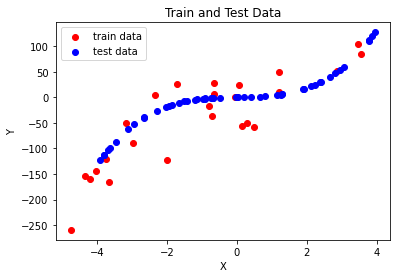

In [111]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Synthetic Data Generation
## This part of the starter code generates a synthetic regression dataset that
## will be used for comparing Ridge and Lasso regression. The output is
## governed by a polynomial y= w_0+w_1x+w_2x^2+...+w_7x^7. x is generated 
## randomly from a uniform distribution. We have also defined the w vector to 
## obtain the outputs. The dependent variable of training dataset is slightly 
## corrupted by adding some noise sampled from a normal distribution. You can 
## play around with this code to understand the dataset, but this is not the lab's focus.
## The code could also be implemented using Numpy Polynomial Library.

# fix the seed for the random function
np.random.seed(2)

# define the size of the train and test sets
train_size=25
test_size=50

## listing the independent and dependent variables which makes it easy to use with 
## data frames later
i_v=["X_1", "X_2", "X_3", "X_4", "X_5", "X_6", "X_7"]
d_v=["Y"]

# define the coefficients of the polynomial
w_opt=np.array([1, 0, 2, 0, 0, 0, 0])

# create an array of numbers sampled from a uniform distribution for the training set
x = np.sort(np.random.uniform(low=-5, high=5, size=train_size))

# creating the training data frame and appending the independent variables
train_data = pd.DataFrame()
train_data["X_1"] = x
train_data["X_2"] = x**2
train_data["X_3"] = x**3
train_data["X_4"] = x**4
train_data["X_5"] = x**5
train_data["X_6"] = x**6
train_data["X_7"] = x**7

# sample a random noise vector
epislon = np.random.normal(loc=0.0, scale=30, size=train_size)

# estimate the training data output. This will serve as the ground truth.
train_data["Y"] = train_data.dot(w_opt)+epislon

# create an array of numbers sampled from a uniform distribution for the test set
x = np.sort(np.random.uniform(low=-4, high=4, size=test_size))

# creating the test data frame and appending the independent variables
test_data = pd.DataFrame()
test_data["X_1"] = x
test_data["X_2"] = x**2
test_data["X_3"] = x**3
test_data["X_4"] = x**4
test_data["X_5"] = x**5
test_data["X_6"] = x**6
test_data["X_7"] = x**7

# estimate the test data output. This will serve as the ground truth.
test_data["Y"] = test_data.dot(w_opt)

# ploting the training and test data
plt.figure(1)
plt.scatter(train_data[["X_1"]], train_data[["Y"]], c="red", label='train data')
plt.scatter(test_data[["X_1"]], test_data[["Y"]], c="blue", label='test data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Train and Test Data')

# Ridge Regression with Cross Validation (1 point)

In [112]:
## We will use the generated data to try Ridge regression and determine the optimal
## alpha value. Read about the RidgeCV class from
## https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
## and describe the following Parameters and attributes of the class
## 
## alphas: The array of alphas to try on for regularization
##
## cv: The number of folds in cross validation
##
## store_cv_values: Boolean value if true then saves the cross validation values in cv_values_
##
## cv_values_ : Value of cross validation for each alpha we tried on
##
## coef_ : The weights
##
## alpha_ : After the cross validation is finished then the estimated regularization constant is here

from sklearn.linear_model import RidgeCV

# Define a range of alpha from 1e-2 to 100 increasing in multiples of 10.
ridge_alphas = np.array([0.01,0.1,1,10,100])

# Define the number of cross validation folds
ridge_number_of_cv_folds = 9

## Create an instance of the regression model using the parameters defined above
ridge_model = RidgeCV(alphas = ridge_alphas,cv = ridge_number_of_cv_folds)

## Fit the model to the training set. Remember that we are performing
## multi-variate regression. The number of independent variables is > 1
ridge_model.fit(train_data[i_v],train_data[d_v])

## Obtain the value of the estimated regularization parameter alpha
ridge_estimated_alpha = ridge_model.alpha_
print("estimated alpha:",ridge_estimated_alpha)
## Display the coefficients of the regressor (weight vector)
print("coefficients are:")
print(ridge_model.coef_)
## Compute the predictions for the training data and save it in a variable
## named y_pred_tr_ridge
y_pred_tr_ridge = ridge_model.predict(train_data[i_v])
## Compute the predictions for the test data and save it in a variable
## named y_pred_ridge
y_pred_ridge = ridge_model.predict(test_data[i_v])

estimated alpha: 10.0
coefficients are:
[[-0.1668026   5.89428889  5.381533   -1.05825025 -0.45636463  0.04956757
   0.01709765]]


# Lasso Regression with Cross Validation (1 point)

In [113]:
## We will use the generated data to try Lasso regression and determine the optimal
## alpha value. Read about the LassoCV class from
## https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
## and describe the following Parameters and attributes of the class
## 
## alphas : The array of alphas to try on for regularization
##
## cv : The number of folds in cross validation
##
## coef_ : The weights
##
## alpha_ : The estimated best alpha amoung the alphas

from sklearn.linear_model import LassoCV

# Define a range of alpha from 1e-2 to 100 increasing in multiples of 10.
lasso_alphas = np.array([0.01,0.1,1,10,100])

# Define the number of cross validation folds
lasso_number_of_cv_folds = 9

## Create an instance of the regression model using the parameters defined above
lasso_model = LassoCV(alphas = lasso_alphas,cv = lasso_number_of_cv_folds)

## Fit the model to the training set. Remember that we are performing
## multi-variate regression. The number of independent variables is > 1
lasso_model.fit(train_data[i_v],train_data[d_v])

## Obtain the value of the estimated regularization parameter alpha
estimated_alpha_lasso = lasso_model.alpha_ 
print("estimated alpha:",estimated_alpha_lasso)
## Display the coefficients of the regressor (weight vector)
print("coefficients are:")
print(lasso_model.coef_)

## Compute the predictions for the training data and save it in a variable
## named y_pred_tr_lasso
y_pred_tr_lasso = lasso_model.predict(train_data[i_v])

## Compute the predictions for the test data and save it in a variable
## named y_pred_lasso
y_pred_lasso = lasso_model.predict(test_data[i_v])

estimated alpha: 1.0
coefficients are:
[ 0.00000000e+00  0.00000000e+00  3.86388278e+00  3.05152539e-01
 -1.45335470e-01 -2.22161187e-02  1.38455971e-03]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2539.6896048974377, tolerance: 11.267267766906027
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13970.214935648994, tolerance: 11.267267766906027
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

# Visualize the outputs(0.5 point)

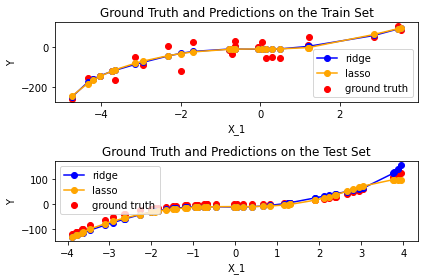

In [114]:
## Let us visualize the regressors. We will create a single image containing
## two plots - one each for train and test set. Label the plots appropriately.
figure, axis = plt.subplots(2,1)
axis[0].set_title("Ground Truth and Predictions on the Train Set")
axis[0].scatter(train_data[["X_1"]], train_data[d_v],color="red",label="ground truth")
axis[0].plot(train_data[["X_1"]],y_pred_tr_ridge,"-o",color="blue",label="ridge")
axis[0].plot(train_data[["X_1"]],y_pred_tr_lasso,"-o",color="orange",label="lasso")
axis[0].set_xlabel('X_1')
axis[0].set_ylabel('Y')
axis[0].legend()

axis[1].set_title("Ground Truth and Predictions on the Test Set")
axis[1].scatter(test_data[["X_1"]], test_data[d_v], color="red", label="ground truth")
axis[1].plot(test_data[["X_1"]],y_pred_ridge,'-o',color="blue",label="ridge")
axis[1].plot(test_data[["X_1"]],y_pred_lasso,'-o',color="orange",label="lasso")
axis[1].set_xlabel('X_1')
axis[1].set_ylabel('Y')
axis[1].legend()
figure.tight_layout()
plt.show()

# Comment on the two models (0.5 point)


*  Is there any qualitative difference between the predictions from the plots?
-> Lasso predicted higher value for Y than ridge
*  Do you notice any difference in the optimal alpha values?
->Alpha for lasso was smaller than ridge for same cv value
*  Do the weight vectors (coefficients) reveal anything?
->Weights for lasso are smaller than ridge





# Cross Validation for Hyper-Parameter Tuning

# Loading a dataset part of the SKLearn Package (0.5 point)

In [115]:
## We will use the diabetes dataset included as part of the sklearn package for this
## part of the lab. Write the necessary code to load the dataset into the workspace
## as a tuple consisting of the independent and dependent variable values
##
## Add a text block to describe the dataset
## - Number of data points
## - Number and list of attributes
## - Identify categorical (discrete) and continuous attributes
from sklearn import datasets
(X, y) = datasets.load_diabetes(return_X_y=True)
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

Number of data points is 442

Number of attributes are 10

List of attributes are age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained

Discrete attributes: age, sex

Continuous attributes: body mass index, average blood pressure, and six blood serum measurements

# Grid Search CV (1.5 points)

In [116]:
## We will use the grid search strategy along with cross validation to
## select the optimal hyper-parameter values for Ridge regression and LASSO.
## We will also measure the time spent for performing this search.

# import that time package to call functions related to time measurement
import time
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
## Read the documentation for SKlearn model selection class GridSearchCV
## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
## Describe the following parameters and attributes of the class in your words.
## estimator: Impliments the skikit-learn estimator interface and we have to pass a score function in estimator or we have to pass in scoring 
##
## param_grid: A dictionary which has parameter names and keys corresponding to it
##
## refit: boolean value, if it is set true then it will refit the estimator using best found parameters
##
## cv: the number of folds
##
## scoring: On the test set, for the evaluation of the performance of cross validation model the strategy function is mentioned here
##
## cv_results_: A dictionary in which keys are column headers and values are columns and also can be imported into DataFrame of pandas .
##
## best_estimator_: estimator with highest score
##
## best_params_: parameters with best results
##
## 

# list of models we want to test
models = []
models.append(('ridge', Ridge()))
models.append(('lasso', Lasso()))

## define a dictionary with hyper-parameter names as keys and a list of 
## permissible values for the hyper-parameter
param_grid = {"alpha" : [0.01,0.1,1,10,100]}

# loop through the two models
for name, model in models:
    
    print(name) # print the model considered for grid search
    
    # create an instance of the GridSearchCV class for perorming a 5-fold CV to estimate the optimal value of alpha
    # scoring function should be negative mean squared error
    # use the default number of cross validation folds
    # set verbose to a level that will enable checking the intermediate outputs
    gridSearchCV_model = GridSearchCV(model,param_grid=param_grid,scoring='neg_mean_squared_error',verbose=5)

    # note the time at the start of the search
    start_time = time.time()

    # fitting the model for grid search
    gridSearchCV_model.fit(train_data[i_v],train_data[d_v])

    # print best parameter after tuning
    print(gridSearchCV_model.best_params_)
    print("Time taken for hyper-parameter tuning is: %s seconds" % (time.time() - start_time))

ridge
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .................alpha=0.01;, score=-1645804.148 total time=   0.0s
[CV 2/5] END ....................alpha=0.01;, score=-4411.706 total time=   0.0s
[CV 3/5] END ....................alpha=0.01;, score=-2809.421 total time=   0.0s
[CV 4/5] END ....................alpha=0.01;, score=-2485.116 total time=   0.0s
[CV 5/5] END ..............alpha=0.01;, score=-2581610852.701 total time=   0.0s
[CV 1/5] END ..................alpha=0.1;, score=-1508766.127 total time=   0.0s
[CV 2/5] END .....................alpha=0.1;, score=-4366.282 total time=   0.0s
[CV 3/5] END .....................alpha=0.1;, score=-2712.252 total time=   0.0s
[CV 4/5] END .....................alpha=0.1;, score=-2487.462 total time=   0.0s
[CV 5/5] END ................alpha=0.1;, score=-269864568.475 total time=   0.0s
[CV 1/5] END .....................alpha=1;, score=-868799.743 total time=   0.0s
[CV 2/5] END .......................alpha=1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.350e+04, tolerance: 8.608e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.290e+03, tolerance: 1.662e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa